<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module0/Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is partially from the textbook "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow".

## Math - Linear Algebra

*Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.*

## Vectors in python

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's `ndarray`, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out the [NumPy tutorial](tools_numpy.ipynb)). For example:


In [ ]:
import numpy as np
v = np.array([10.5, 5.2, 3.25, 7.0])
v

array([10.5 ,  5.2 ,  3.25,  7.  ])

The size of a vector can be obtained using the `size` attribute.

The $i^{th}$ element (also called *entry* or *item*) of a vector $\textbf{v}$ is noted $\textbf{v}_i$.

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access $\textbf{video}_3$ programmatically, we would write:

In [ ]:
print(v.shape)
print(v[2])


(4,)
3.25


## Plotting vectors
To plot vectors we will use matplotlib, so let's start by importing it (for details about matplotlib, check the [matplotlib tutorial](tools_matplotlib.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2D vectors
Let's create a couple very simple 2D vectors to plot:

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])
print(u)
print(v)

[2 5]
[3 1]


These vectors each have 2 elements, so they can easily be represented
graphically on a 2D graph, for example as points:

(np.int64(2), np.int64(3))
(np.int64(5), np.int64(1))


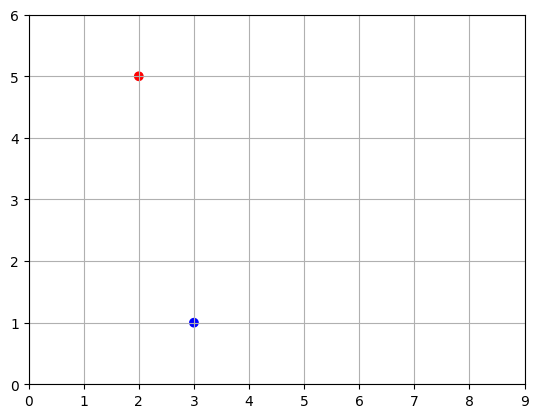

In [ ]:
x_coords, y_coords = zip(u, v)
print(x_coords)
print(y_coords)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Vectors can also be represented as arrows. Let's create a small convenience
function to draw nice arrows:

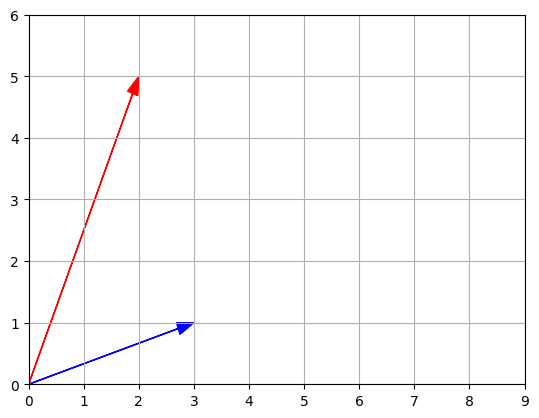

In [ ]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$.
A norm is a function  $\|\cdot\|:  \mathbb{R}^{n} \to [0,\infty)$ satisfying, for any $x, y\in \mathbb{R}^n$ and $\alpha\in \mathbb{R}$, that


- $\|x\| \ge  0 $ and $\|x\|=0$  $\Longleftrightarrow$  $x =0$

- $\|x + y\|\le \|x\| + \|y\|  $

-  $\|\alpha x\| = |\alpha| \|x\|$

There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Some other examples,
$p$-norm,   $\|x\|_p =  (\sum_{i=1}^n |x_i|^p)^{1/p}$ for $1\le p\le \infty$ and $\|x\|_\infty = \max_{1\leq i\leq n} |x_i|$

In [ ]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


np.float64(5.385164807134504)

However, it is much more efficient to use NumPy's `norm` function, available
in the `linalg` (**Lin**ear **Alg**ebra) module:

In [ ]:
import numpy.linalg as LA
print(u)

print(LA.norm(u))
print(LA.norm(u,1))
print(LA.norm(u,np.inf))

[2 5]
5.385164807134504
7.0
5.0


## Dot product
### Definition
- The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:
$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$,
where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

- we say vectors $u$ and $v$ are orthogonal if $u^\top v =0$, i.e., $\angle(u,v) = \pi/2$.

- The set of $S = \{u_1, \ldots,u_k\}\subset\mathbb{R}^n$ ($k\leq n$) is called orthogonal if its elements are pairwise orthogonal, i.e., $u_i^\top u_j = 0$ for $i\neq j$; if,  furthermore, $\|u_i\|=1$ for any $i=1,2,\ldots, k$ then $S$ is called orthonormal


### In python
The dot product is pretty simple to implement:

In [ ]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

np.int64(11)

*But* a *much* more efficient implementation is provided by NumPy with the `dot` function.
Equivalently, you can use the `dot` method of `ndarray`s.

In [ ]:
print(np.dot(u,v))
print(u.dot(v))
print(v.dot(u))


11
11
11


**Caution**: the `*` operator will perform an *elementwise* multiplication, *NOT* a dot product:

In [ ]:
u * v

array([6, 5])

### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

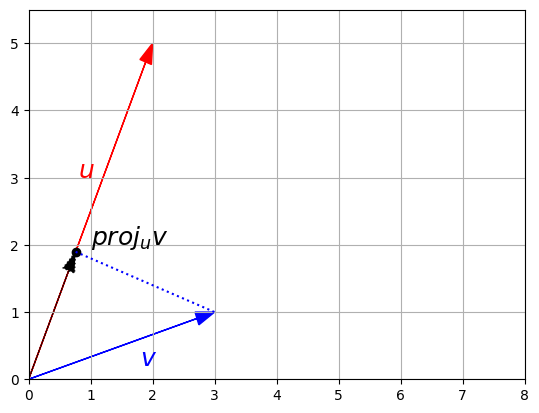

In [ ]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

# Matrices
A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling.

In [ ]:
A = np.array([
    [10,20,30],
    [40,50,60],
    [70,80,90]
])
print(A) # prefered

B =np.matrix([
    [10,20,30],
    [40,50,60]
])
print(B)


[[10 20 30]
 [40 50 60]
 [70 80 90]]
[[10 20 30]
 [40 50 60]]


## Size
The size of a matrix is defined by its number of rows and number of columns. It is noted $rows \times columns$. For example, the matrix $A$ above is an example of a $2 \times 3$ matrix: 2 rows, 3 columns. Caution: a $3 \times 2$ matrix would have 3 rows and 2 columns.

To get a matrix's size in NumPy:

Caution**: the `size` attribute represents the number of elements in the `ndarray`, not the matrix's size:

In [ ]:
print(A.shape)
print(A.size)

(3, 3)
9


## Element indexing
The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$, but there is no standard notation, so people often prefer to explicitely name the elements, like this: "*let $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". This means that $X$ is equal to:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

However in this notebook we will use the $X_{i,j}$ notation, as it matches fairly well NumPy's notation. Note that in math indices generally start at 1, but in programming they usually start at 0.

In [ ]:
print('A is\n', A)
print("-"*20)
print('2nd row, 3rd column is', A[1,2])  # 2nd row, 3rd column
print('2nd row vector is', A[1, :])  # 2nd row vector (as a 1D array)
print('3rd column vector is', A[:, 2])  # 3rd column vector (as a 1D array)
print('rows 1 to 2  is', A[0:2, :])  # rows 1 to 3 (excluded): this returns row 1 & 2 as a two-row matrix
print('columns 2 to 3 (excluded) is\n',  A[:, 1:2])   # columns 2 to 3 (excluded): this returns column 2 as a one-column matrix
print('columns 2  is\n',  A[:, 1])  # returns column 2 as a one-column array
print('columns 2  is\n',  A[:, [1] ])  # returns column 2 as a one-column matrix

A is
 [[10 20 30]
 [40 50 60]
 [70 80 90]]
--------------------
2nd row, 3rd column is 60
2nd row vector is [40 50 60]
3rd column vector is [30 60 90]
rows 1 to 2  is [[10 20 30]
 [40 50 60]]
columns 2 to 3 (excluded) is
 [[20]
 [50]
 [80]]
columns 2  is
 [20 50 80]
columns 2  is
 [[20]
 [50]
 [80]]


## Matrix multiplication
A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

In [ ]:
F = np.array([
        [5,2, 1],
        [4,1,1],
        [9,3,1]
    ])
print(A.dot(F))
print(F.dot(A))
print(A*F)

[[ 400  130   60]
 [ 940  310  150]
 [1480  490  240]]
[[200 280 360]
 [150 210 270]
 [280 410 540]]
[[ 50  40  30]
 [160  50  60]
 [630 240  90]]


**Caution**: NumPy's `*` operator performs elementwise multiplication, *NOT* a matrix multiplication:

In [ ]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
B = np.array([[1,2,3], [4, 5, 6]])
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

## Converting 1D arrays to 2D arrays in NumPy
As we mentionned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [ ]:
u = np.array([2, 5])
print(u)
print(u.T)

[2 5]
[2 5]


In [ ]:
u_row = np.array([u])
print(u_row)
print(u_row.T)

[[2 5]]
[[2]
 [5]]


In [ ]:
# some interesting examples
A=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

b=np.array([1,2,3])

c=np.array([[1,2,3]])
print(A.shape)

print(b.shape)

print(c.shape)



print(A.dot(b))
#this outputs a 1D array

print(A.dot(c.T))
# this outputs a column matrix

print(A.dot(b) - A.dot(c.T) )
#this should not be zero!



b_row = np.array([b])

print(A.dot(b_row.T) - A.dot(c.T) )
# this actually is zero!

(4, 3)
(3,)
(1, 3)
[14 32 50 68]
[[14]
 [32]
 [50]
 [68]]
[[  0  18  36  54]
 [-18   0  18  36]
 [-36 -18   0  18]
 [-54 -36 -18   0]]
[[0]
 [0]
 [0]
 [0]]


In [ ]:
# norm of the matrix
print(LA.norm(A)) # Fro-norm
print(LA.norm(A,2)) # 2-norm

print(LA.norm(u)) # 2-norm/ Fro-norm  if u is a vector

25.495097567963924
25.462407436036393
5.385164807134504


## Matrix rank

Given a matrix  $A\in \mathbb{R}^{m\times n}$:

- all its column vectors form a linear space and the dimension of this space is called column rank of $A$.

- all its row vectors form a linear space and the dimension of this space is called row rank  of $A$.

- column rank of of $A$ equals  its row rank. thus we simply refer to this number as the rank of $A$.

- rank of $A\in \mathbb{R}^{m\times n}$  is at most $\min(m,n)$.

- nonzero column vector $a \in \mathbb{R}^{n}$ (also is matrix $a\in \mathbb{R}^{n\times 1}$ ) has rank 1. $ab^T \in\mathbb{R}^{n\times n}$ is also of rank-1.

In [ ]:
print(LA.matrix_rank(A))
u = np.array([[2],
               [5]])
v = np.array([[3, 1]])
print(u.dot(v))
print(LA.matrix_rank(u.dot(v)))

2
[[ 6  2]
 [15  5]]
1


## Singular Value Decomposition
SVD is a matrix factorization which is a key step in many algorithms. Machine learning and statistical methods are based on SVD: least squares regression, principal component analysis for dimension reduction and spectral clustering. SVD is essential for understanding and implementing ML/statistical methods.

It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

Also use the convention that the diagonal entries of $\Sigma$ are non-negative and non-increasing:
$$ \sigma_1\ge \sigma_2 \ge \ldots \ge \sigma_p\ge 0, ~~ p= \min(n,m)$$


In [ ]:
F = np.matrix([
        [1, 1.5],
        [0, 1]
    ])

U, S_diag, V_T = LA.svd(F) # note: in python 3 you can rename S_diag to Σ_diag
print('U is \n',U)
print('S_diag is \n', S_diag)
print('V_T is \n', V_T)


print(U.dot(np.diag(S_diag)).dot(V_T))



U is 
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
S_diag is 
 [2.  0.5]
V_T is 
 [[ 0.4472136   0.89442719]
 [-0.89442719  0.4472136 ]]
[[ 1.00000000e+00  1.50000000e+00]
 [-1.25949234e-17  1.00000000e+00]]


## Property of SVD
- SVD always exists

- the number of nonzero singular values equals the rank of $A$

- $A = \sum_{i=1}^{p} \sigma_i u_i v_i^\top$, where $p = \min(m,n)$.

- $u_i$ is a  left singular vector and $v_i$ is a right singular vector satisfying
$$ Av_i =  \sigma_i u_i, ~~~ u_i^\top A = \sigma_i v_i^\top $$

- The columns of $U$ are the eigenvectors of $ AA^\top$; columns of $V$ are eigenvectors of $A^\top A$;

- The singular values of $A$ are the square roots of those of $A^\top A$  (equivalently, $AA^\top$)


### Low-rank matrix approximation
Another way of explaining SVD is to regard  $A$ as a sum of $r$ rank-one matrices with $r = \mbox{rank}(A)$:
$$  A =  \sum_{j=1}^r \sigma_j u_jv_j^\top$$

Let $k\leq r$.  The $k$-partial sum $A_k = \sum_{j=1}^k  \sigma_j u_j v_j^\top $ captures much of the "energy" of $A$ as possible. $A_k$ minimizes $\|A- X\|_F$ over $\{X\in \mathbb{R}^{m\times n}:  \mbox{rank}(X)\le k\}$,  namely,
$$
A_k = \arg\min_{X\in\mathbb{R}^{m\times n}}\; \|X - A\|_F \quad  \mbox{subject to} \quad \mbox{rank}(X)\leq k.
$$




# Eigenvectors and eigenvalues
- An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:
$$M \cdot v = \lambda \times v$$
Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$. Then the eigen-decomposition is
$$ M = U\Lambda U^{-1} $$

- $\sum_{i=1}^n \lambda_i = \mbox{Tr}(\Lambda) = \mbox{Tr}(M)$.

- Given any symmetric matrix $A\in \mathbb{R}^{n\times n}$, its eigen-decomposition is
$$A = U\Lambda U^\top $$
where $U\in \mathbb{R}^{n\times n}$ is orthonormal  and $\Lambda$ is diagonal. if all eigenvalues are nonnegative, then $A$ is positive semidefinite (PSD); if all  $\lambda_i>0$, then $A$ is PD.

In [ ]:
eigenvalues, eigenvectors = LA.eig(F)
print(eigenvalues)
print(eigenvectors) # [v0, v1, …]

[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.48029737e-16]]


In [ ]:
G = np.matrix([
        [1.4, 0],
        [0, 1/1.4]
    ])    # G is PD.
eigenvalues, eigenvectors = LA.eig(G)
print(eigenvalues)
print(eigenvectors) # [v0, v1, …]

[1.4        0.71428571]
[[1. 0.]
 [0. 1.]]


In [ ]:
?LA.norm